In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from itertools import groupby
from random import choices
import random
from math import exp
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
sbn.set(rc={'figure.figsize':(18,12)})

In [3]:
DATH_HOME = "../../data/pdb_str"
alphabet = "m32k25"

In [4]:
df = pd.read_csv("%s/statistics/aggregated_stat_%s.csv" % (DATH_HOME, alphabet))

In [5]:
_df_obs = df.groupby("length")["observed_freq"].sum().reset_index(name="N")
_df_mm0_exp = df.groupby("length")["exp_mm0"].sum().reset_index(name="N")
_df_mm1_exp = df.groupby("length")["exp_mm1"].sum().reset_index(name="N")
_df_mm2_exp = df.groupby("length")["exp_mm2"].sum().reset_index(name="N")

In [149]:
_df_obs["N_prob"] = _df_obs.N / sum(_df_obs.N)
_df_mm0_exp["N_prob"] = _df_mm0_exp.N / sum(_df_mm0_exp.N)
_df_mm1_exp["N_prob"] = _df_mm1_exp.N / sum(_df_mm1_exp.N)
_df_mm2_exp["N_prob"] = _df_mm2_exp.N / sum(_df_mm2_exp.N)

In [150]:
sample_size = 100000
distr_obs = np.random.choice(_df_obs.length.values, sample_size, p=_df_obs.N_prob.values)
distr_mm0 = np.random.choice(_df_mm0_exp.length.values, sample_size, p=_df_mm0_exp.N_prob.values)
distr_mm1 = np.random.choice(_df_mm1_exp.length.values, sample_size, p=_df_mm1_exp.N_prob.values)
distr_mm2 = np.random.choice(_df_mm2_exp.length.values, sample_size, p=_df_mm2_exp.N_prob.values)

In [1]:
# https://arxiv.org/pdf/1301.0148.pdf
# https://medium.com/@ph_singer/order-estimation-for-markov-chain-models-6cde3ad2410b
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3562003/
# loc, scale = gumbel_r.fit(distr_mm2)
loc, scale = gumbel_r.fit(distr_mm0)
loc1, scale1 = gumbel_r.fit(distr_mm2)
loc2, scale2 = gumbel_r.fit(distr_obs)
x_plot = np.linspace(0, 100)
_ = plt.plot(x_plot, gumbel_r.pdf(x_plot, loc, scale), color="blue")
_ = plt.plot(x_plot, gumbel_r.pdf(x_plot, loc1, scale1))
_ = plt.plot(x_plot, gumbel_r.pdf(x_plot, loc2, scale2))

NameError: name 'gumbel_r' is not defined

In [ ]:
# https://medium.com/@ph_singer/order-estimation-for-markov-chain-models-6cde3ad2410b

[1.99996836e+00 9.60531807e-05]


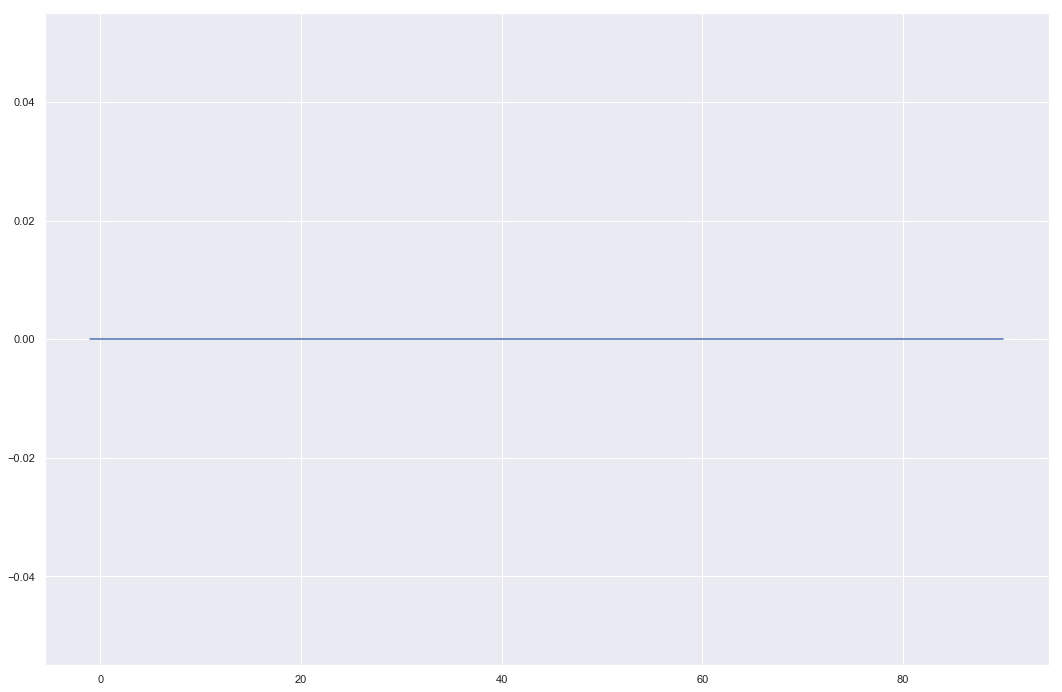

In [95]:
from scipy.stats import gumbel_r, frechet_r
from scipy.optimize import curve_fit
from numpy.random import uniform


_df_mm0_exp.N = _df_mm0_exp.N + 1000

obs_param, pcov = curve_fit(gumbel_r.pdf, _df_obs.length, _df_obs.N, [0,1])
# mm2_param, pcov = curve_fit(gumbel_r.pdf, _df_mm2_exp.length, _df_mm2_exp.N, obs_param)
# # mm1_param, pcov = curve_fit(gumbel_r.pdf, _df_mm1_exp.length, _df_mm1_exp.N, obs_param)
mm0_param, pcov = curve_fit(gumbel_r.pdf, _df_mm0_exp.length, _df_mm0_exp.N, p0=[0,1])
print(mm0_param)

x_plot = np.linspace(-1, 90, )
# _ = plt.plot(x_plot,gumbel_r.pdf(x_plot, obs_param[0], obs_param[1]))
# _ = plt.plot(x_plot, gumbel_r.pdf(x_plot, mm2_param[0], mm2_param[1]))
# # _ = plt.plot(x_plot, gumbel_r.pdf(x_plot, mm1_param[0], mm1_param[1]))
_ = plt.plot(x_plot, gumbel_r.pdf(x_plot, mm0_param[0], mm0_param[1]))
# 
# _ = plt.bar(_df_mm0_exp.length, _df_mm0_exp.N, fc=(0, 0, 1, 0.2))
# _ = plt.bar(_df_mm1_exp.length, _df_mm1_exp.N, fc=(1, 0, 0, 0.2))

# plt.xlabel('Anzahl der Fragmentzeichen', fontsize=14)
# plt.title('Alphabet: %s, loc: %s, scale %s'  % (alphabet, round(loc, 3), round(scale, 3)))



<BarContainer object of 77 artists>

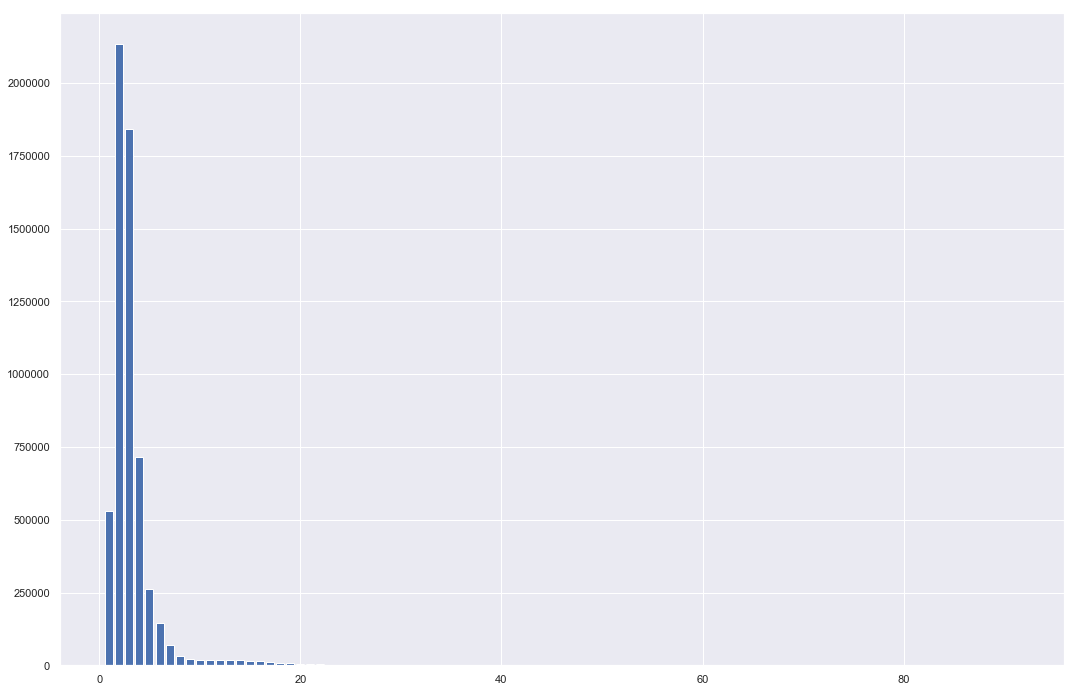

In [75]:
plt.bar(_df_mm0_exp.length, _df_mm0_exp.N)

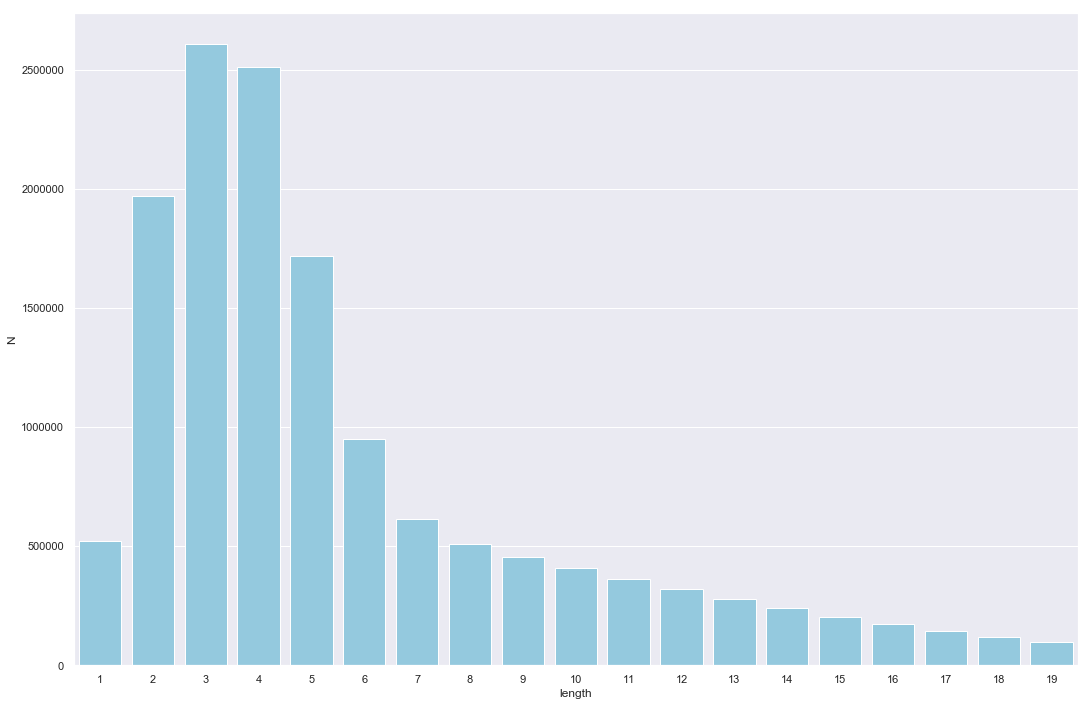

In [64]:
sbn.set(rc={'figure.figsize':(18,12)})
# sbn.barplot(_df_obs.length, _df_obs.N, color="#85C1E9")

# sbn.barplot( _df_mm0_exp["length"], _df_mm0_exp["N"], color="skyblue")
sbn.barplot( _df["length"], _df["N"], color="skyblue")
# sbn.plt.legend()

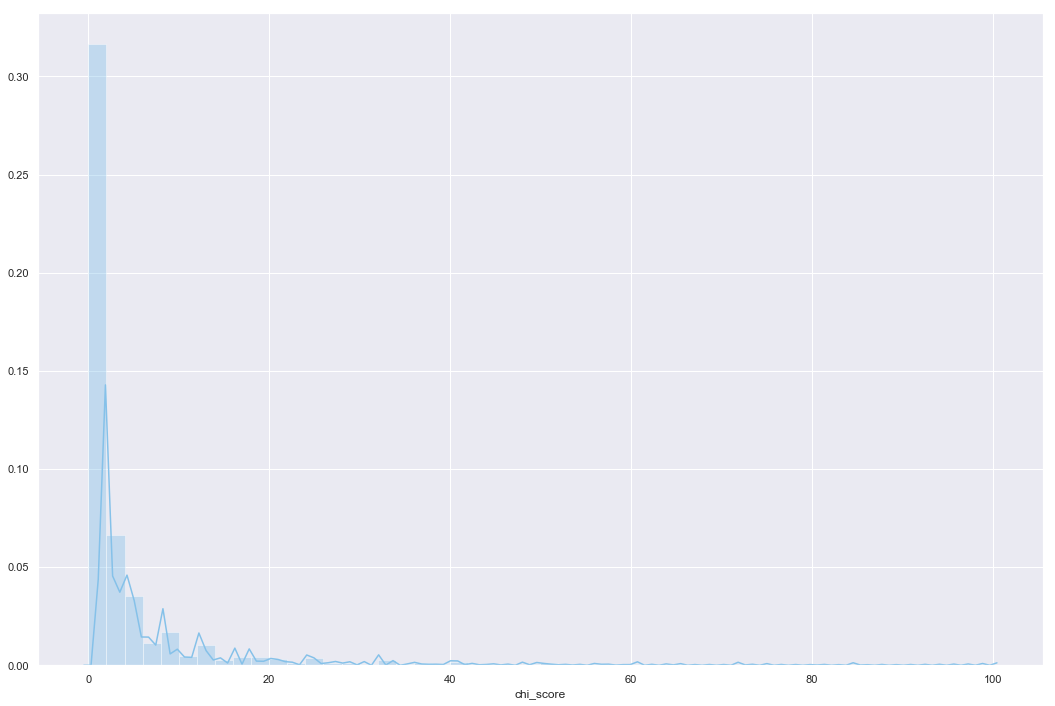

In [12]:
_df = df[df.chi_score < 100]
sbn.distplot(_df.chi_score,  color="#85C1E9")

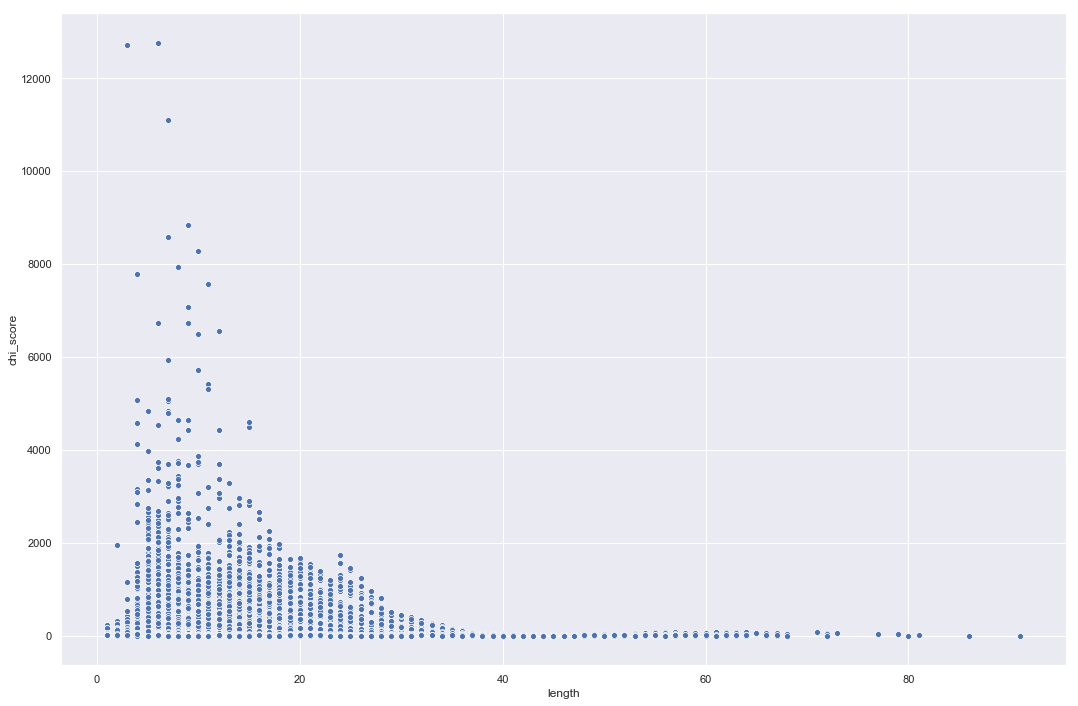

In [13]:
_df = df[df.length < 200]
_ = sbn.scatterplot(_df.length, _df.chi_score)

In [5]:
# _df = df.sample(frac=0.5)
# sbn.set(rc={'figure.figsize':(18,12)})
# fig, ax = plt.subplots()
# _ = sbn.scatterplot(_df.expected_freq, _df.observed_freq, ax=ax, color="#059DC0")
# _ = sbn.lineplot(x=[0, 22000],y=[0, 22000], color = "red")
# _ = sbn.regplot(_df.expected_freq, _df.observed_freq, ax=ax) 
# _ = ax.set(title= "Expected vs Observed for alphabet:  %s " % alphabet)

In [ ]:
# _df.sample(10)[["hit","observed_freq", "expected_freq", "chi_score"]]

In [ ]:
# sbn.set(rc={'figure.figsize':(18,12)})
# _df = df[df.expected_freq < 1000]
# _df = df.sample(frac=0.5)
# fig, ax = plt.subplots()

# yaxis = range(0, 1200, 200)
# xaxis = range(0, 1200, 200)

# _ = sbn.scatterplot(_df.expected_freq, _df.observed_freq, ax=ax, color="#059DC0")
# _ = sbn.regplot(_df.expected_freq, _df.observed_freq, ax=ax) 
# _ = sbn.lineplot(x=xaxis,y=yaxis,color = "red")
# _ = ax.set(title= "Expected vs Observed for alphabet:  %s " % alphabet)

C:\Users\tomin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


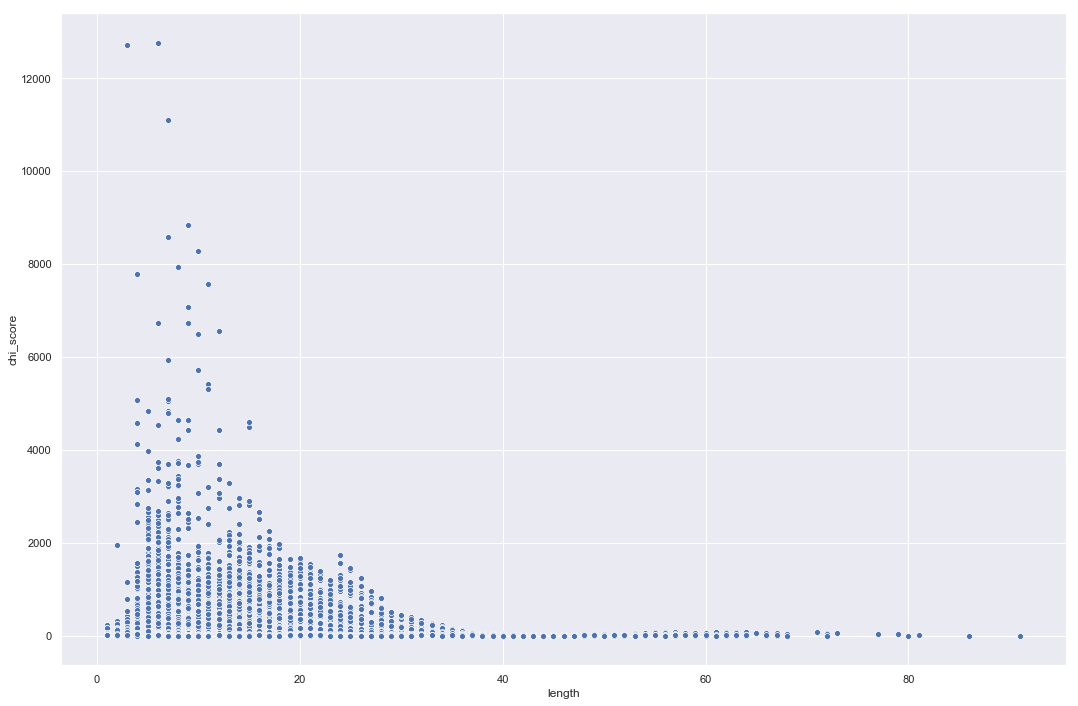

In [26]:
_df = df[df.length < 200]
_ = sbn.scatterplot(_df.length, _df.chi_score)

      fun: 1792001.2913601007
 hess_inv: array([[1.55443094e-05]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([8.62231542])


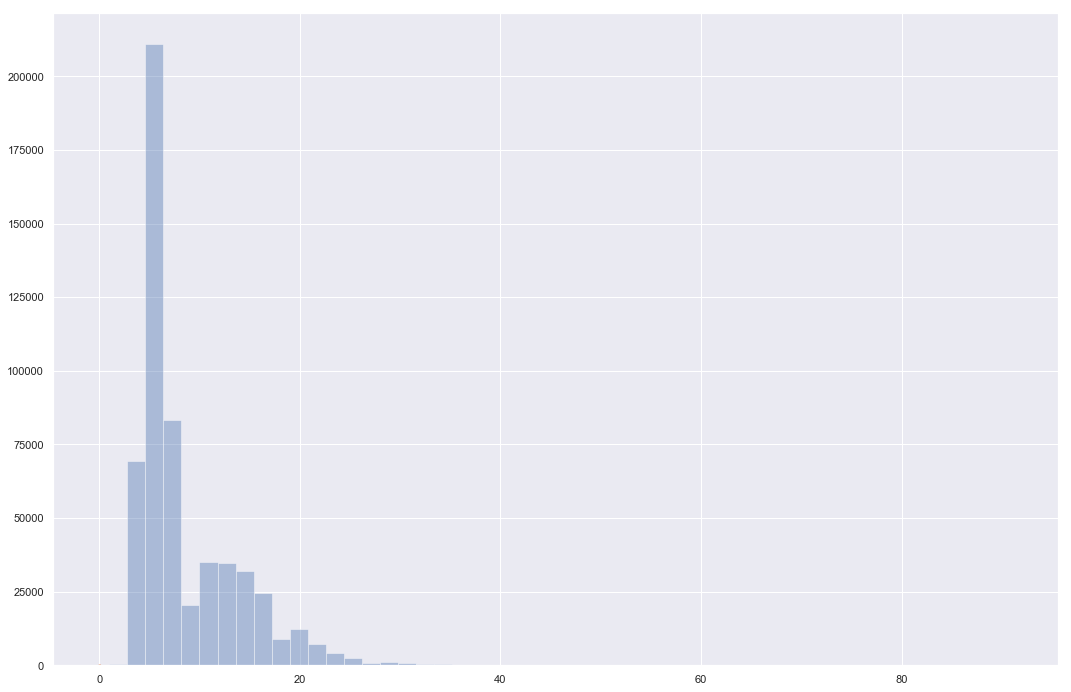

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import factorial


def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negLogLikelihood(params, data):
    """ the negative log-Likelohood-Function"""
    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

data = df[df.length < 100].length.values
# data = df.length.values

# minimize the negative log-Likelihood
result = minimize(negLogLikelihood,  # function to minimize
                  x0=np.ones(1),     # start value
#                   args=(df.length.values,),# additional arguments for function
                  args=(data,),# additional arguments for function
                  method='BFGS',   # minimization method, see docs
                  )

# result is a scipy optimize result object, the fit parameters 
# are stored in result.x
print(result)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 100, 1000)

# plt.hist(data)
sbn.set(rc={'figure.figsize':(18,12)})
_ = sbn.distplot(data, kde=False)
_ = sbn.distplot(poisson(x_plot, result.x), kde=True, hist=False)

# plt.hist(data, bins=np.arange(15) - 0.5, normed=True)
# plt.plot(x_plot, poisson(x_plot, result.x), 'r-', lw=2)
# plt.show()

C:\Users\tomin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Alphabet: chem, Lambda: 8.0')

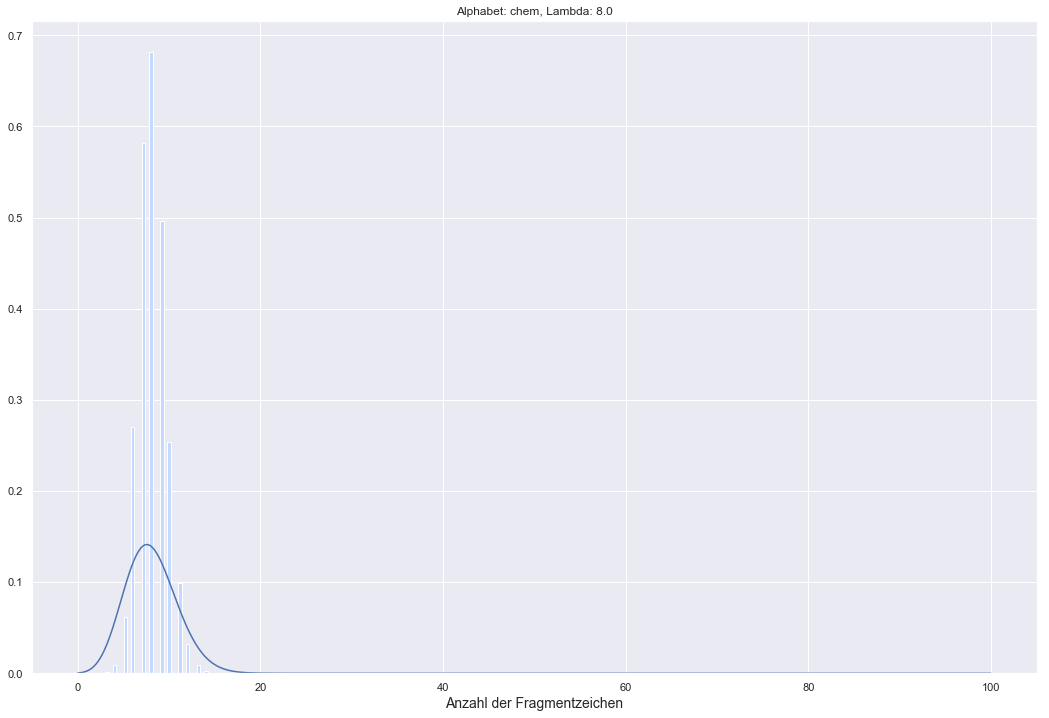

In [45]:
_= plt.hist(data, bins=150, normed=True, color="#C3D9FF" )
_ = plt.plot(x_plot, poisson(x_plot, result.x[0]))
plt.xlabel('Anzahl der Fragmentzeichen', fontsize=14)
plt.title('Alphabet: %s, Lambda: %s' % (alphabet, round(result.x[0])))

In [75]:
from sklearn import datasets
data_set = datasets.load_breast_cancer()
y=data_set.data[:,0]

dist = getattr(stats, "expon")
loc, scale = dist.fit(y)
print(loc, scale)

6.981 7.1462917398945525


C:\Users\tomin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Alphabet: m32k25, loc: 6.494, scale 3.184')

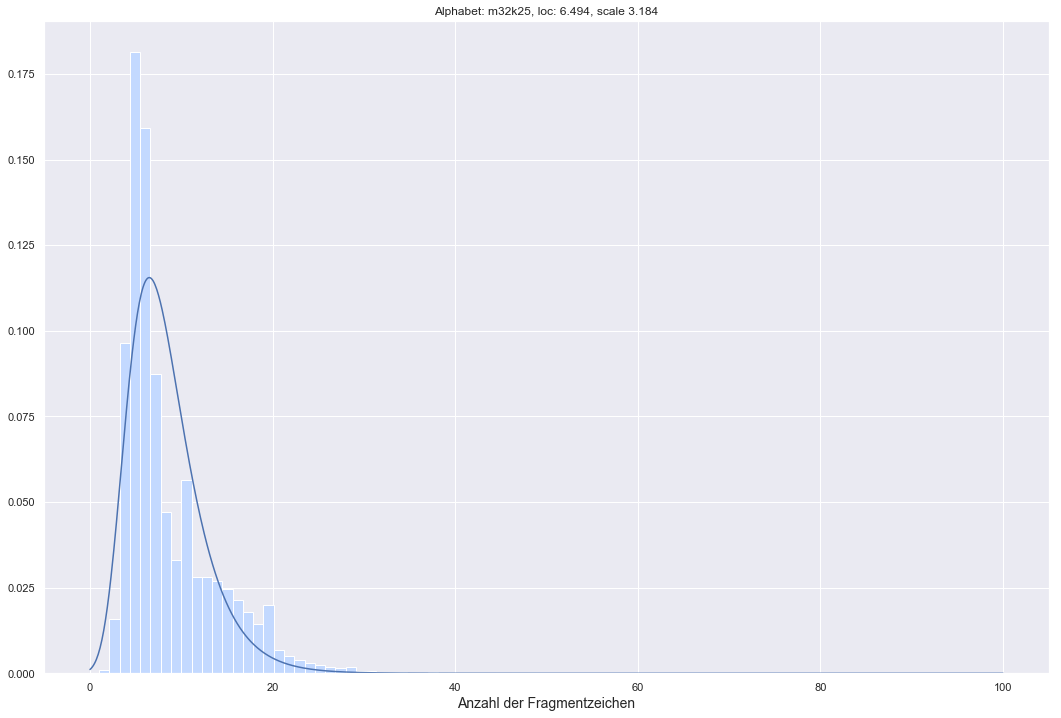

In [50]:
from scipy.stats import gumbel_r
loc, scale = gumbel_r.fit(data)
_= plt.hist(data, bins=80, normed=True, color="#C3D9FF" )
_ = plt.plot(x_plot, gumbel_r.pdf(x_plot, loc, scale))
plt.xlabel('Anzahl der Fragmentzeichen', fontsize=14)
plt.title('Alphabet: %s, loc: %s, scale %s'  % (alphabet, round(loc, 3), round(scale, 3)))

In [41]:
from scipy.stats import kstest, chisquare

# np.linspace(min(data), max(data), len(data))
# gumbel_r.pdf(np.linspace(min(data), max(data), len(data)), loc, scale)

# chisquare(data, f_exp=gumbel_r.pdf(np.linspace(min(data), max(data), len(data)), loc, scale))

# from scipy.stats import gumbel_r
# loc, scale = gumbel_r.fit(data)
# _= plt.hist(data, bins=100, normed=True, color="#C3D9FF" )
# _ = plt.plot(x_plot, gumbel_r.pdf(x_plot, loc, scale))

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [ ]:
# sbn.kdeplot(_df.length)
# from scipy.stats.distributions import poisson
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize

# L = _df.groupby("length").size().reset_index(name="N")

# def log_likelihood(k, mu):
#     return poisson.logpmf(k, mu).sum()

# params = minimize(log_likelihood, x0=_df.length.mean(), args=(L,))
# plot(L, poisson, params)
# # print(_df.length.mean(), params.x[0])